In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree


In [2]:
# Read the CSV file
df_org = pd.read_csv("file:///Users/genevauy/Desktop/DATA_Customer-Churn.csv")


In [3]:
# Convert column names to lowercase
df_org = df_org.rename(columns=lambda x: x.lower())


In [4]:
# Select relevant columns
selected_columns = ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn']
df = df_org[selected_columns].copy()


In [5]:
# Convert 'churn' column values to numeric
df["churn"] = df["churn"].map({'No': 0, 'Yes': 1})


In [6]:

# Convert 'totalcharges' column to float
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')


In [7]:

# Handle missing values in 'totalcharges' column
mean_totalcharges = df['totalcharges'].mean()
df['totalcharges'].fillna(mean_totalcharges, inplace=True)


In [15]:
df

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


#### Splitting

In [8]:

# Split the data into training and test sets
X = df[['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges']]
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)



#### Scaling

In [9]:

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [10]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

# Performance metrics for Logistic Regression
performance_log = pd.DataFrame({'Error_metric': ['Accuracy', 'Precision', 'Recall'],
                                'Train': [accuracy_score(y_train, y_pred_train_log),
                                          precision_score(y_train, y_pred_train_log),
                                          recall_score(y_train, y_pred_train_log)],
                                'Test': [accuracy_score(y_test, y_pred_test_log),
                                         precision_score(y_test, y_pred_test_log),
                                         recall_score(y_test, y_pred_test_log)]})
display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.789315,0.799858
1,Precision,0.649606,0.690476
2,Recall,0.442656,0.460317


In [11]:
# Confusion matrix for Logistic Regression
cm_train_log = confusion_matrix(y_train, y_pred_train_log)
cm_test_log = confusion_matrix(y_test, y_pred_test_log)


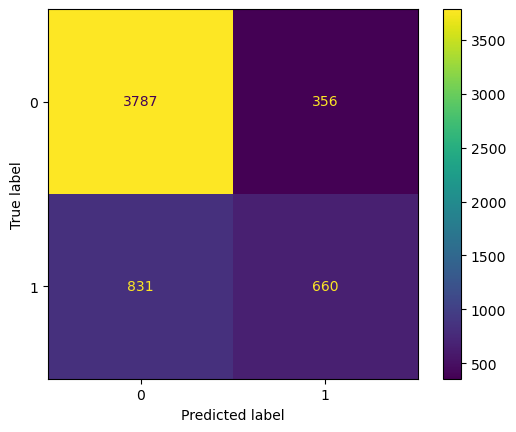

In [12]:

disp_train_log = ConfusionMatrixDisplay(cm_train_log)
disp_train_log.plot()


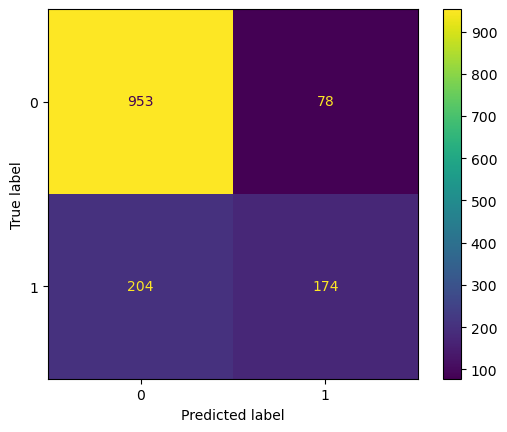

In [13]:

disp_test_log = ConfusionMatrixDisplay(cm_test_log)
disp_test_log.plot()


In [14]:

# Invert the values of y_train and y_test to change the prediction to "whether the customer will not churn"
y_train_inv = y_train.apply(lambda x: 1 if x == 0 else 0)
y_test_inv = y_test.apply(lambda x: 1 if x == 0 else 0)


## KNN Classifier

In [82]:
model_knn = KNeighborsClassifier(n_neighbors=2, weights='uniform')
model_knn.fit(X_train_scaled, y_train_inv)
y_pred_train_knn = model_knn.predict(X_train_scaled)
y_pred_test_knn = model_knn.predict(X_test_scaled)

In [83]:
# Performance metrics for KNN
performance_knn = pd.DataFrame({'Error_metric': ['Accuracy', 'Precision', 'Recall'],
                                'Train': [accuracy_score(y_train_inv, y_pred_train_knn),
                                          precision_score(y_train_inv, y_pred_train_knn),
                                          recall_score(y_train_inv, y_pred_train_knn)],
                                'Test': [accuracy_score(y_test_inv, y_pred_test_knn),
                                         precision_score(y_test_inv, y_pred_test_knn),
                                         recall_score(y_test_inv, y_pred_test_knn)]})
display(performance_knn)

,Error_metric,Train,Test
0,Accuracy,0.86,0.70
1,Precision,1.00,0.85
2,Recall,0.82,0.72


In [84]:
# Confusion matrix for KNN
cm_train_knn = confusion_matrix(y_train_inv, y_pred_train_knn)
cm_test_knn = confusion_matrix(y_test_inv, y_pred_test_knn)


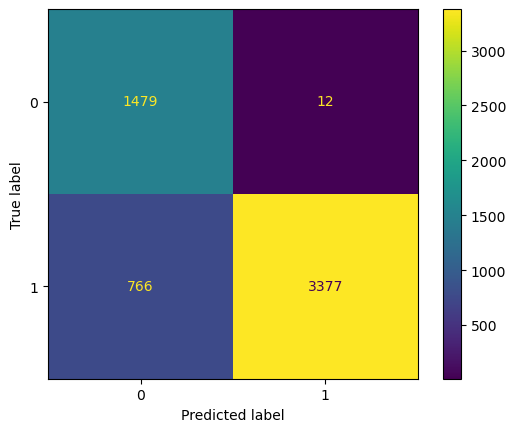

In [85]:
disp_train_knn = ConfusionMatrixDisplay(cm_train_knn)
disp_train_knn.plot()


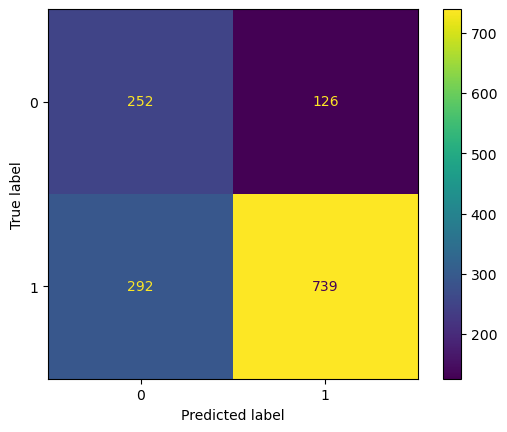

In [86]:
disp_test_knn = ConfusionMatrixDisplay(cm_test_knn)
disp_test_knn.plot()


In [87]:
for i in range (1, 4): 
        model = KNeighborsClassifier(n_neighbors=i,weights='uniform') 
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled) 
        y_pred_train=model.predict(X_train_scaled)

    
        performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})
    
        pd.options.display.float_format = '{:.2f}'.format

        print("For K=", i, "\n", performance_df,"\n" )

For K= 1 
   Error_metric  Train  Test
0     Accuracy   0.99  0.74
1    Precision   0.98  0.51
2       Recall   0.98  0.46 

For K= 2 
   Error_metric  Train  Test
0     Accuracy   0.87  0.77
1    Precision   0.99  0.64
2       Recall   0.50  0.32 

For K= 3 
   Error_metric  Train  Test
0     Accuracy   0.86  0.77
1    Precision   0.79  0.58
2       Recall   0.66  0.47 



## Decision Tree

In [56]:
model_dt = DecisionTreeClassifier(max_depth=3)
model_dt.fit(X_train, y_train_inv)
y_pred_train_dt = model_dt.predict(X_train)
y_pred_test_dt = model_dt.predict(X_test)


In [57]:
performance_dt = pd.DataFrame({'Error_metric': ['Accuracy', 'Precision', 'Recall'],
                               'Train': [accuracy_score(y_train_inv, y_pred_train_dt),
                                         precision_score(y_train_inv, y_pred_train_dt),
                                         recall_score(y_train_inv, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test_inv, y_pred_test_dt),
                                        precision_score(y_test_inv, y_pred_test_dt),
                                        recall_score(y_test_inv, y_pred_test_dt)]})
display(performance_dt)


,Error_metric,Train,Test
0,Accuracy,0.784523,0.784244
1,Precision,0.812061,0.804184
2,Recall,0.919865,0.932105


In [88]:
# Confusion matrix for Decision Tree
cm_train_dt = confusion_matrix(y_train_inv, y_pred_train_dt)
cm_test_dt = confusion_matrix(y_test_inv, y_pred_test_dt)


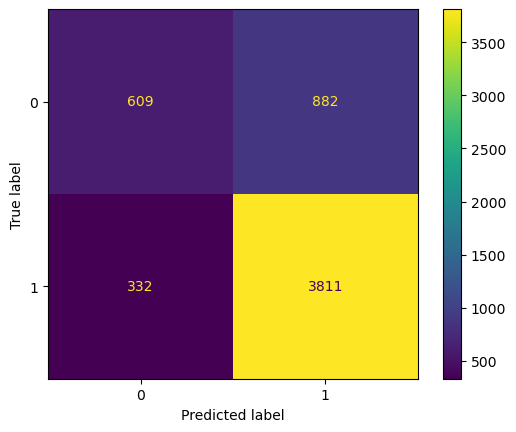

In [89]:
disp_train_dt = ConfusionMatrixDisplay(cm_train_dt)
disp_train_dt.plot()


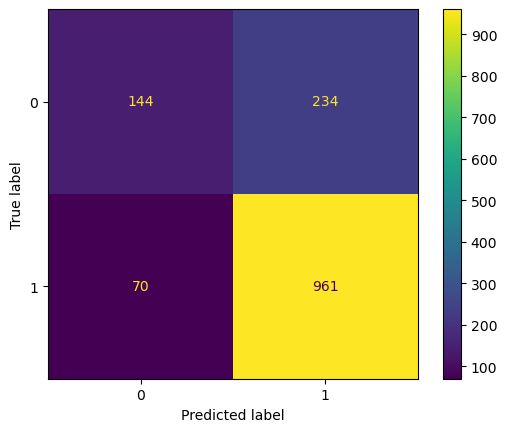

In [90]:

disp_test_dt = ConfusionMatrixDisplay(cm_test_dt)
disp_test_dt.plot()


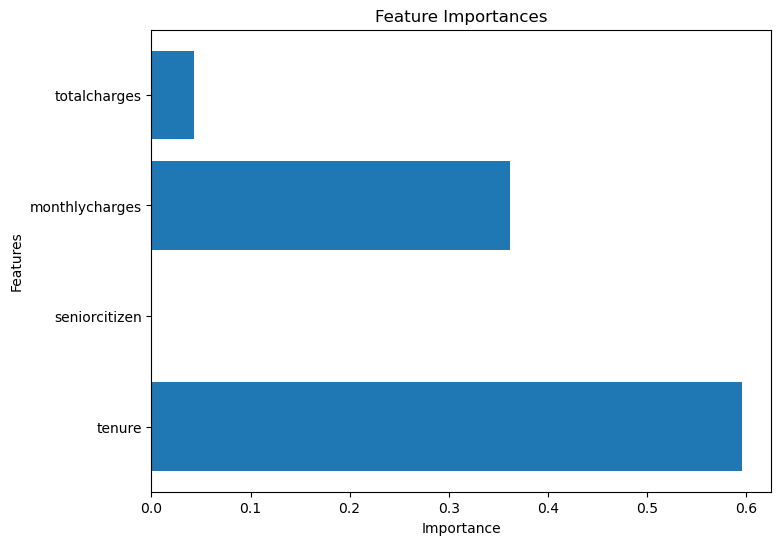

In [92]:
# Bar plot of feature importances
feature_importances = model_dt.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()


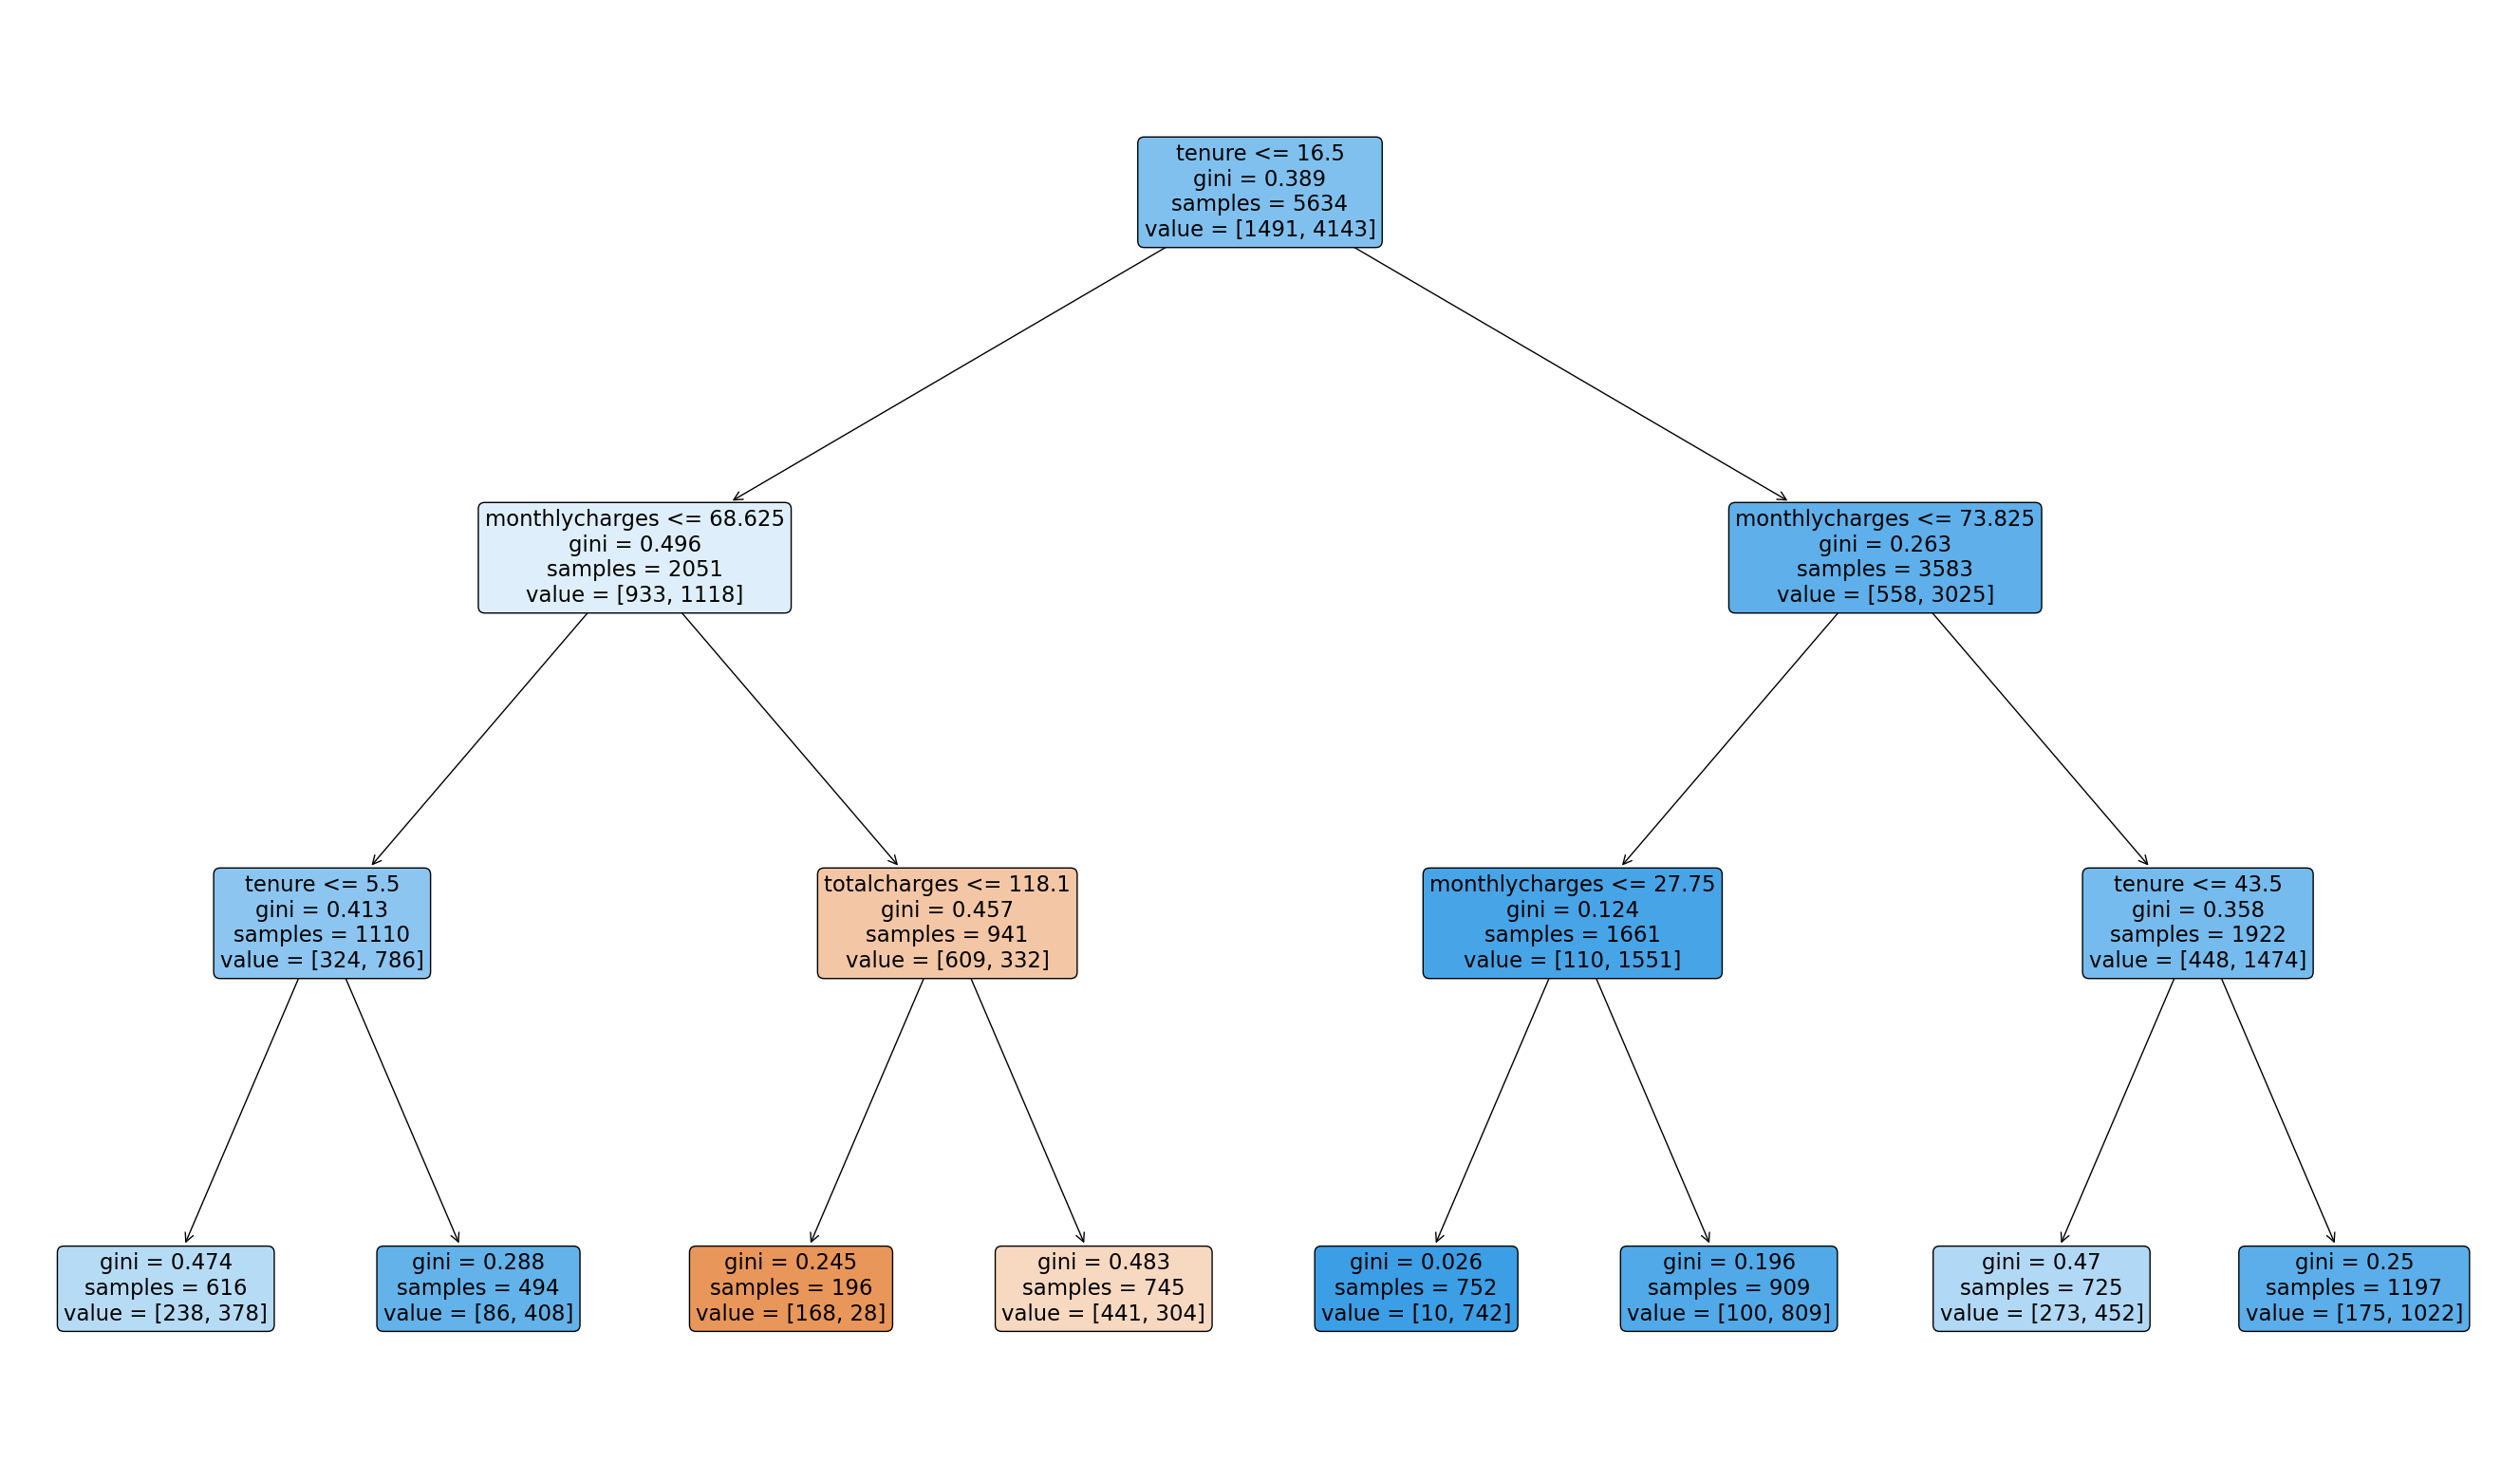

In [95]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(34, 20))
plot_tree(model_dt, filled=True, rounded=True, feature_names=X.columns)
plt.show()


In [96]:
for i in range(1, 15):
    model = DecisionTreeClassifier(max_depth=3)
    model.fit(X_train, y_train)
    y_pred_train_dt = model.predict(X_train)
    y_pred_test_dt = model.predict(X_test)

    # Update performance_df for each iteration
    performance_df.loc[0, 'Train'] = accuracy_score(y_train, y_pred_train_dt)
    performance_df.loc[1, 'Train'] = precision_score(y_train, y_pred_train_dt)
    performance_df.loc[2, 'Train'] = recall_score(y_train, y_pred_train_dt)
    
    performance_df.loc[0, 'Test'] = accuracy_score(y_test, y_pred_test_dt)
    performance_df.loc[1, 'Test'] = precision_score(y_test, y_pred_test_dt)
    performance_df.loc[2, 'Test'] = recall_score(y_test, y_pred_test_dt)

    pd.options.display.float_format = '{:.2f}'.format

    print("For T =", i, "\n", performance_df, "\n")

    # Move these lines within the loop to print the result for each iteration
    print("For T =", i, "\n", performance_df, "\n")

For T = 1 
   Error_metric  Train  Test
0     Accuracy   0.78  0.78
1    Precision   0.65  0.67
2       Recall   0.41  0.38 

For T = 1 
   Error_metric  Train  Test
0     Accuracy   0.78  0.78
1    Precision   0.65  0.67
2       Recall   0.41  0.38 

For T = 2 
   Error_metric  Train  Test
0     Accuracy   0.78  0.78
1    Precision   0.65  0.67
2       Recall   0.41  0.38 

For T = 2 
   Error_metric  Train  Test
0     Accuracy   0.78  0.78
1    Precision   0.65  0.67
2       Recall   0.41  0.38 

For T = 3 
   Error_metric  Train  Test
0     Accuracy   0.78  0.78
1    Precision   0.65  0.67
2       Recall   0.41  0.38 

For T = 3 
   Error_metric  Train  Test
0     Accuracy   0.78  0.78
1    Precision   0.65  0.67
2       Recall   0.41  0.38 

For T = 4 
   Error_metric  Train  Test
0     Accuracy   0.78  0.78
1    Precision   0.65  0.67
2       Recall   0.41  0.38 

For T = 4 
   Error_metric  Train  Test
0     Accuracy   0.78  0.78
1    Precision   0.65  0.67
2       Recall   0.41 